In [61]:
## found a way to remove white spances in columnsqq

import pandas as pd 
import numpy as np
import re

# defining null values so we can replace them easely with fillna() method
missing_values = ['','nan', 'None','Notspecified']

df = pd.read_csv("unique_ids.csv", na_values= missing_values)

# removing the spaces at the end and begining of the column name
for i in df.columns:
    df.rename(columns={i: i.strip()}, inplace=True)

# removes dataset from group 2
df = df.drop(df[df.source == 2].index)

# removing dolar signs, commas and euro signs in the price column
# df['price'] = df['price'].replace({'$': '', ',': '',"€":""}, regex=True)


del df['Unnamed: 0']


In [62]:
# area :
# making sure we have only numeric values
# null values are replaced by -1
# making sure there are no numbers after commas



df['area'] = df['area'].astype(str)
# removing m² and white spaces
df['area'] = df['area'].replace({'m': '', ' ': '',"²":""}, regex=True)
# changing all row with Notspecified to NaN
df.loc[df.area == "Notspecified"] = np.nan
df.loc[df.area == "nan"] = np.nan
# remove numbers after the comma
df['area'] = df['area'].str.replace('.0','')
# deal with empty strings
df.loc[df['area'] == '', 'area'] = '-1'
# replace all null values with -1
df.area.fillna('-1', inplace=True)
# deal with 0 as an int
df.loc[df['area'] == 0, 'area'] = '-1'
# deal with 0 as a string
df.loc[df['area'] == '0', 'area'] = '-1'
# tranform everyting in numeric value
df["area"] = pd.to_numeric(df["area"])
print(df.area.isnull().sum())


df['property_subtype'] = df['property_subtype'].astype(str)
df['property_subtype'] = df['property_subtype'].apply(lambda x : x.upper())

def float_price(price):
    if None == price:
        return -1
    if type(price) == str:

        match  = re.match('[0-9.,]+', price)
        if match :
            matchPrice = re.search('[0-9.,]+', price).group(0)
            matchPrice = matchPrice.replace(',','.')
            return float(matchPrice)
        else :
            return -1
    else :
        return float(price)

df.price = df.price.apply(lambda x : float_price(x))
df.price = df.price.fillna(-1)


#we need to delete the duplicates. We have in hyperlink column the immoweb id's and the urls. 
#We cut the missing id's from the urls with regex.

# the fuction of getting id's
def find_id(x):
    if type(x) is str and "immoweb" in x:
        for n in re.findall("([0-9]+)",x):
            if len(n) == 7:

                return int (n)
    else: 
        return x

df.hyperlink = df.hyperlink.apply(find_id)

#check the null values
df.hyperlink.isnull().sum()

#change the type
df.hyperlink = pd.to_numeric(df['hyperlink'],errors='coerce')
#check the null values after changing the type: no mising value
df.hyperlink.isnull().sum()


#see the duplicated id's
duplicateRowsDF = df[df.duplicated(["hyperlink"])]
duplicateRowsDF

#drop the empty id's
df = df[df['hyperlink'].notna()]

#drop the duplicated id's
df = df.drop_duplicates(subset=['hyperlink'])

#the id's are unique
df.hyperlink.is_unique

#save the file
df.to_csv('unique_ids.csv')



#number of rooms
#the missing parts of rooms_number column fixed as "-1" to convert the type
df[df.rooms_number==""] = np.NaN
df['rooms_number'] = df['rooms_number'].fillna(-1)
df.loc[df['rooms_number'] == '', 'rooms_number'] = '-1'
df.loc[df['rooms_number'] == 'None', 'rooms_number'] = '-1'

df["rooms_number"] = pd.to_numeric(df["rooms_number"])




0


In [46]:
# answer the question : what are the most expensive areas?

import pandas as pd
import numpy as np

df = pd.read_csv("main_latest_final.csv", sep=';')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   hyperlink          28000 non-null  int64  
 1   postcode           28000 non-null  int64  
 2   Province           28000 non-null  object 
 3   Region             28000 non-null  object 
 4   house_is           28000 non-null  int64  
 5   property_subtype   28000 non-null  object 
 6   price              28000 non-null  float64
 7   rooms_number       28000 non-null  int64  
 8   area               28000 non-null  int64  
 9   kitchen_has        26059 non-null  object 
 10  furnished          26922 non-null  object 
 11  open_fire          27108 non-null  object 
 12  terrace            26292 non-null  object 
 13  terrace_area       26292 non-null  float64
 14  garden             26541 non-null  object 
 15  garden_area        21471 non-null  float64
 16  land_surface       178

In [56]:

pd.set_option('display.float_format', '{:.2f}'.format)
df = df[df.area > 20]
ff_house = df[df.house_is == 1]
ff_app =df[df.house_is == 0]
ff_house['price per square meter'] = ff.price / ff.area
ff_app['price per square meter'] = ff.price / ff.area
province_house = ff_house.groupby(['Province']).mean().sort_values(by='price per square meter',ascending=False)['price per square meter']
province_app = ff_app.groupby(['Province']).mean().sort_values(by='price per square meter',ascending=False)['price per square meter']
region_house = ff_house.groupby(['Region']).mean().sort_values(by='price per square meter',ascending=False)['price per square meter']
region_app = ff_app.groupby(['Region']).mean().sort_values(by='price per square meter',ascending=False)['price per square meter']


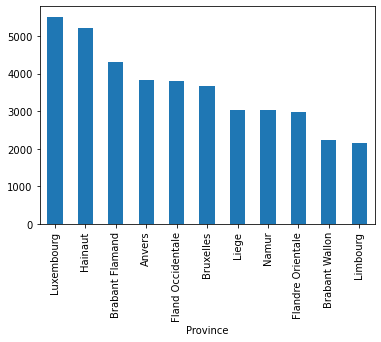

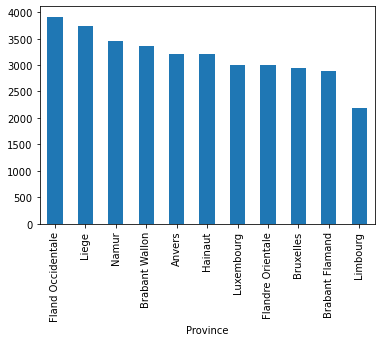

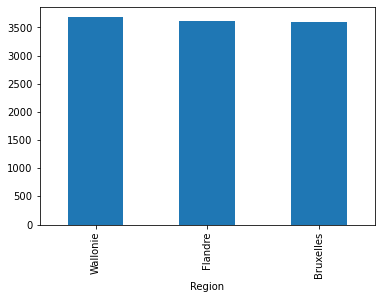

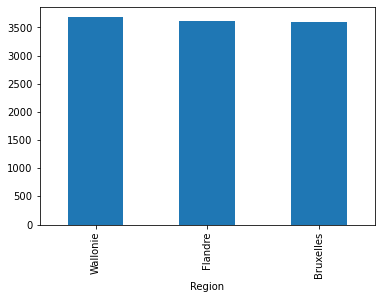

In [55]:
import matplotlib.pyplot as plt
from collections import Counter


province_app.plot(y= "price per square meter" , kind = 'bar')
plt.show()
province_house.plot(y= "price per square meter" , kind = 'bar')
plt.show()
region_house.plot(y= "price per square meter" , kind = 'bar')
plt.show()
region_app.plot(y= "price per square meter" , kind = 'bar')
plt.show()